# TITRE


**Auteur** : Lélie Chenouga (utilisation de ChatGPT)

**Date** : 17 janvier 2025

# Introduction

Ce projet vise à confronter le tableau des voyelles d'IPA Chart avec des données expérimentales. Notre objectif est de créer une figure qui corresponde à la répartition des voyelles en fonction de leur premier et deuxième formants, les fréquences principale de ces sons. 

**Les voyelles selon leurs formants sont-elles bien disposées comme dans le tableau ?**

Dans un premier temps nous créont un jeu de données extrayant le premier et le deuxième formant pour chaque voyelle à partir des enregistrement puis nous représentons la decription graphique.

# Library Import

In [135]:
import parselmouth
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from parselmouth import praat
#sound = parselmouth.Sound(audio_files[0]) 

In [138]:
# Pour un notebook Jupyter
audio_directory = os.path.join(os.getcwd(), "AUDIO_TEST")
audio_files = [os.path.join(audio_directory, f) for f in os.listdir(audio_directory) if f.endswith(".wav")]
print(audio_files)


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'c:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\AUDIO_TEST'

In [139]:
import os

# Définir le chemin du dossier audio comme un sous-dossier du dossier où se trouve le notebook
audio_directory = os.path.join(os.path.dirname('AUDIO_TEST'), "AUDIO_TEST")

# Lister les fichiers audio avec l'extension .wav dans le dossier
audio_files = [os.path.join(audio_directory, f) for f in os.listdir(audio_directory) if f.endswith(".wav")]

# Afficher la liste des fichiers audio trouvés
print(audio_files)


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'AUDIO_TEST'

In [128]:
audio_directory = "C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST"
audio_files = [os.path.join(audio_directory, f) for f in os.listdir(audio_directory) if f.endswith(".wav")]
print(audio_files)

['C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\02_a.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\02_e.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\02_i.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\02_o.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\02_ou.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\02_u.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\02_è.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\02_é.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\03_a.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\03_e.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\03_i.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\03_o.wav', 'C:\\Users\\lelie\\Desktop\\COURS\\L2\\LINGUISTIQUE\\AUDIO_TEST\\03_ou.wav', 'C:\\User

In [141]:
audio_directory = ".//AUDIO_TEST"
audio_files = [os.path.join(audio_directory, f) for f in os.listdir(audio_directory) if f.endswith(".wav")]
print(audio_files)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: './/AUDIO_TEST'

# Dataset Creation

J'ai enregistré N personnes âgées de 18 à 21 ans prononçant les mots « un pot, un pas, un peu, une pie, un “p”, une paix, un poux, un pain, un pont, ça pue, ça pend ». Ensuite, j'ai découpé chaque voyelle pour chaque individu, en nommant chaque fichier avec un numéro de clé associé à un participant (de 01 à N), et une description de la voyelle ("o", "a", "e", "i", "é", "è", "in", "ou", "on", "u", "en").

In [129]:
# On crée la fonction pour extraire les formants moyens de chaque fichier audio

def extract_formants(audio_file):
    # On charge le fichier audio 
    sound = parselmouth.Sound(audio_file)

    # On precise les paramètres pour la détection des points
    f0min = 75  # On définit la fréquence fondamentale minimale
    f0max = 300  # On définit la fréquence fondamentale maximale
    pointProcess = praat.call(sound, "To PointProcess (periodic, cc)", f0min, f0max)

    # On indique les paramètres pour l'extraction des formants
    formants = praat.call(sound, "To Formant (burg)", 0.0025, 5, 5000, 0.025, 50)

    # On extrait les formants F1 et F2 pour chaque point détecté
    numPoints = praat.call(pointProcess, "Get number of points")
    f1_list = []
    f2_list = []

    for point in range(0, numPoints):
        point += 1
        t = praat.call(pointProcess, "Get time from index", point)
        f1 = praat.call(formants, "Get value at time", 1, t, 'Hertz', 'Linear')
        f2 = praat.call(formants, "Get value at time", 2, t, 'Hertz', 'Linear')
        if not pd.isna(f1) and not pd.isna(f2):  # On ignore les NaN
            f1_list.append(f1)
            f2_list.append(f2)

    # ON calcule les moyennes
    mean_f1 = sum(f1_list) / len(f1_list) if f1_list else None
    mean_f2 = sum(f2_list) / len(f2_list) if f2_list else None

    return mean_f1, mean_f2

# On crée une liste vide pour stocker les données
data = []
i = 0
# On automatise l'extraction des formants pour chaque fichier audio
for audio_file in audio_files:
    f1, f2 = extract_formants(audio_file)
        # Extraire le nom du fichier sans le chemin et sans l'extension
    file_name = os.path.basename(audio_file).split('.')[0]
    
    # On extrait le participant et la voyelle pour chaque enregistrement
    participant, vowel = file_name.split('_')  
    data.append({"Participant": participant, "Vowel": vowel, "F1": f1, "F2": f2})
    i+=1
    print(data[i-1])

# On convertit notre liste en DataFrame pour une analyse facile
df = pd.DataFrame(data)

# On affiche les données
print(df)


{'Participant': '02', 'Vowel': 'a', 'F1': 756.8294948891742, 'F2': 1407.1922516471775}
{'Participant': '02', 'Vowel': 'e', 'F1': 446.0756342601934, 'F2': 1565.9021427291202}
{'Participant': '02', 'Vowel': 'i', 'F1': 309.9670747916164, 'F2': 2054.5201069120703}
{'Participant': '02', 'Vowel': 'o', 'F1': 422.40591062223353, 'F2': 1013.0627279680643}
{'Participant': '02', 'Vowel': 'ou', 'F1': 313.54361083955746, 'F2': 1265.3227000894005}
{'Participant': '02', 'Vowel': 'u', 'F1': 276.0080541248636, 'F2': 1860.4015258506365}
{'Participant': '02', 'Vowel': 'è', 'F1': 539.2019368411455, 'F2': 2015.9169069257719}
{'Participant': '02', 'Vowel': 'é', 'F1': 404.3800852579245, 'F2': 2221.0377793638368}
{'Participant': '03', 'Vowel': 'a', 'F1': 893.6958538546595, 'F2': 1230.6946701443414}
{'Participant': '03', 'Vowel': 'e', 'F1': 393.86878682698375, 'F2': 1414.6469985388999}
{'Participant': '03', 'Vowel': 'i', 'F1': 307.9025755496591, 'F2': 1355.0132880289789}
{'Participant': '03', 'Vowel': 'o', 'F1

# Data description

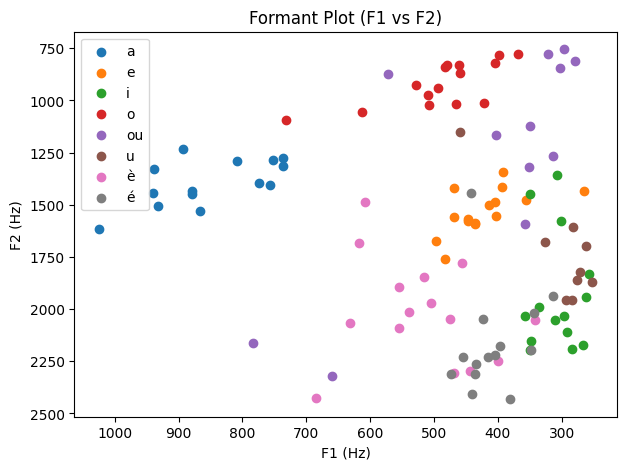

In [130]:
# Graphique F1-F2
plt.figure(figsize=(7, 5))  # On définit la taille de la figure

# On parcourt les différentes voyelles v dans la colonne "Vowel" du DataFrame
for vowel in df["Vowel"].unique():
    subset = df[df["Vowel"] == vowel]  # On considere un sous tableau des donnees la voyelle v
    plt.scatter(subset["F1"], subset["F2"], label=vowel)  # On trace un nuage de points (scatter plot) pour F1 et F2 de cette voyelle v

# On inverse l'axe des abscisse et des ordonnées pour que l'orientation du graphique corresponde à la figure d'IPA chart
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# On ajoute une légende au graphique, positionnée en dehors de l'axe principal.
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2,  # Position en haut à gauche par rapport à l'axe principal.
           borderaxespad=0.,  # On retire l'espace entre la légende et l'axe.
           frameon=False)  # On retire le cadre autour de la légende.

# On nomme les axes et le graphique
plt.xlabel("F1 (Hz)")
plt.ylabel("F2 (Hz)")
plt.title("Formant Plot (F1 vs F2)")
# On affiche la légende et le graphique final
plt.legend()
plt.show()


In [131]:
mapping = {
    "u": "y",
    "ou": "u",
    "e": "∅",
    "é": "e",
    "è": "ε"
}

# Application du mapping à la colonne concernée (par exemple, 'Vowel')
df["Vowel"] = df["Vowel"].map(mapping).fillna(df["Vowel"])  # Si des valeurs ne sont pas dans le mapping, elles restent inchangées.

# Affichage du DataFrame pour vérification
print(df)

    Participant Vowel          F1           F2
0            02     a  756.829495  1407.192252
1            02     ∅  446.075634  1565.902143
2            02     i  309.967075  2054.520107
3            02     o  422.405911  1013.062728
4            02     u  313.543611  1265.322700
..          ...   ...         ...          ...
106          16     ∅  264.619380  1435.703400
107          16     i  256.538028  1831.301332
108          16     o  398.576453   782.297776
109          16     ε  456.572121  1776.726513
110          16     e  314.015392  1936.921517

[111 rows x 4 columns]


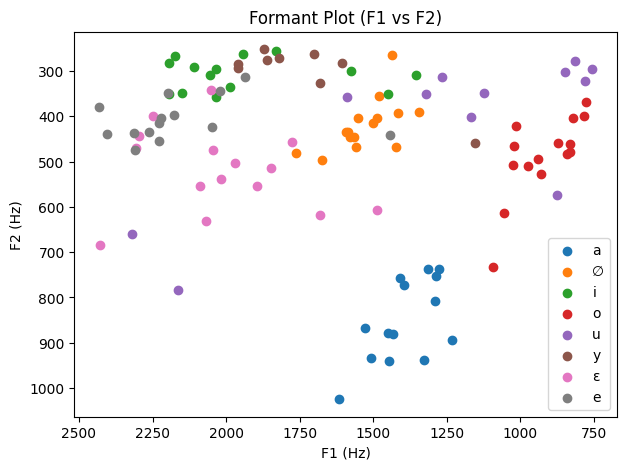

In [132]:
# Graphique F1-F2
plt.figure(figsize=(7, 5))  # On définit la taille de la figure

# On parcourt les différentes voyelles v dans la colonne "Vowel" du DataFrame
for vowel in df["Vowel"].unique():
    subset = df[df["Vowel"] == vowel]  # On considere un sous tableau des donnees la voyelle v
    plt.scatter(subset["F2"], subset["F1"], label=vowel)  # On trace un nuage de points (scatter plot) pour F1 et F2 de cette voyelle v

# On inverse l'axe des abscisse et des ordonnées pour que l'orientation du graphique corresponde à la figure d'IPA chart
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# On ajoute une légende au graphique, positionnée en dehors de l'axe principal.
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2,  # Position en haut à gauche par rapport à l'axe principal.
           borderaxespad=0.,  # On retire l'espace entre la légende et l'axe.
           frameon=False)  # On retire le cadre autour de la légende.

# On nomme les axes et le graphique
plt.xlabel("F1 (Hz)")
plt.ylabel("F2 (Hz)")
plt.title("Formant Plot (F1 vs F2)")
# On affiche la légende et le graphique final
plt.legend()
plt.show()


In [133]:
from IPython.display import HTML

# Affichage de l'image avec un fond blanc
html_code = """
<div style="background-color: white; display: inline-block; padding: 10px;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/2/20/IPA-french-vowel-chart.png" width="500" height="400">
</div>
"""
display(HTML(html_code))


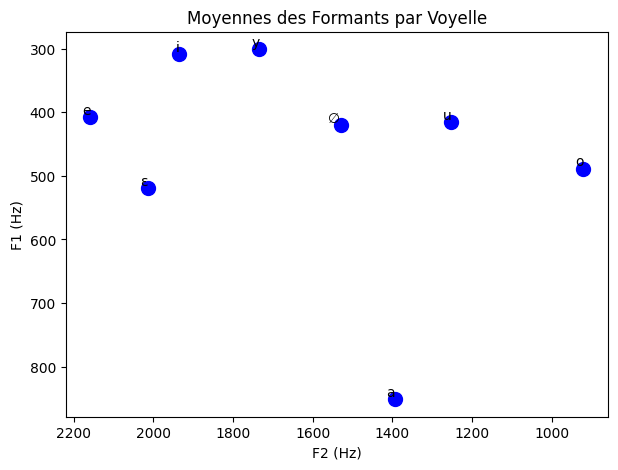

In [134]:
# On calcule des moyennes pour chaque voyelle
mean_values = df.groupby("Vowel")[["F1", "F2"]].mean().reset_index()

# On crée du graphique avec les moyennes
plt.figure(figsize=(7, 5))  
plt.scatter(mean_values["F2"], mean_values["F1"], color="blue", s=100)  

# Ajout des annotations pour identifier les voyelles
for _, row in mean_values.iterrows():
    plt.text(row["F2"], row["F1"], row["Vowel"], fontsize=10, ha="right", va="bottom")

# Inversion des axes selon les conventions
plt.gca().invert_yaxis()  # Inversion de l'axe des ordonnées
plt.gca().invert_xaxis()  # Inversion de l'axe des abscisses

# Ajout des labels et du titre
plt.xlabel("F2 (Hz)")
plt.ylabel("F1 (Hz)")
plt.title("Moyennes des Formants par Voyelle")

# Affichage du graphique
plt.show()
